In [3]:
print("hey")

hey


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
import os

In [11]:
ls

Brain_tumour/      Linear_algo.ipynb  README.md          Untitled.ipynb


In [13]:
path = os.listdir('Brain_tumour/Training/')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [16]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Brain_tumour/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])
        
#here we assign the basic x : training and y : target of the one to be trained

In [18]:
#also we resize the images to (200,200) as ml algo does not take it in
#Now we checking what is in y 

In [19]:
X = np.array(X)
Y = np.array(Y)

In [20]:
np.unique(Y)


array([0, 1])

In [23]:
pd.Series(Y).value_counts()
#827 have brain tumour 
#395 have pituitary tumour

1    827
0    395
dtype: int64

In [24]:
X.shape

(1222, 200, 200)

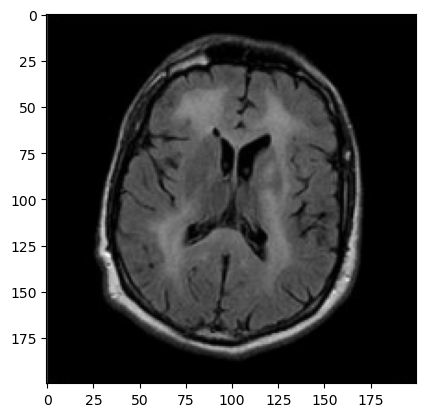

In [26]:
plt.imshow(X[2], cmap='gray')
#visualise data

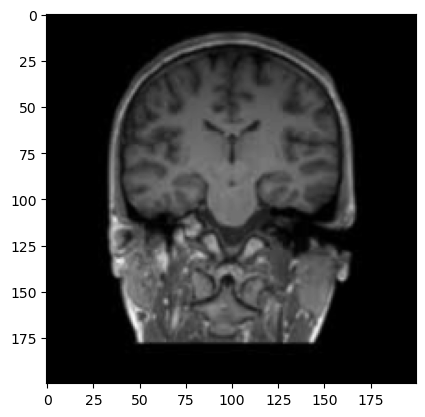

In [27]:
plt.imshow(X[4], cmap='gray')


In [28]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)
#data is split up

In [30]:
xtrain.shape, xtest.shape
#shape of train and test should be similar

((977, 40000), (245, 40000))

In [31]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [34]:
#scaling out inputs to match up to recources

In [33]:
from sklearn.decomposition import PCA


In [35]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [36]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [38]:
#Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [39]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [40]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [41]:
#evaluating the model according to scores for accuracy 

In [42]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 12,  28,  33, 106, 129, 162, 171, 172, 202, 210]),)

In [43]:
pred[36]


1

In [44]:
ytest[36]


1

In [45]:
dec = {0:'No Tumor', 1:'Positive Tumor'}


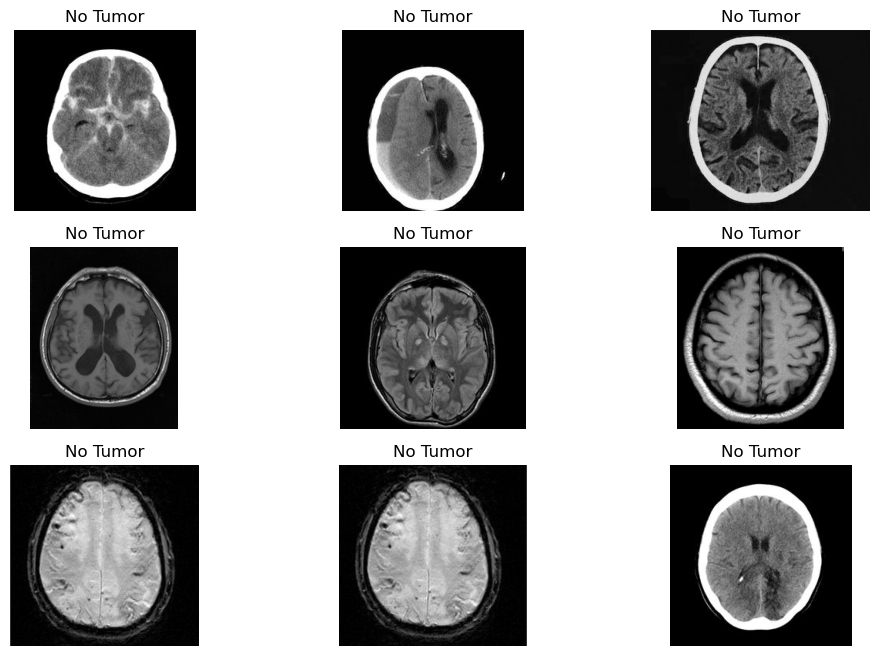

In [47]:
plt.figure(figsize=(12,8))
p = os.listdir('Brain_tumour/Testing/')
c=1
for i in os.listdir('Brain_tumour/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('Brain_tumour/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

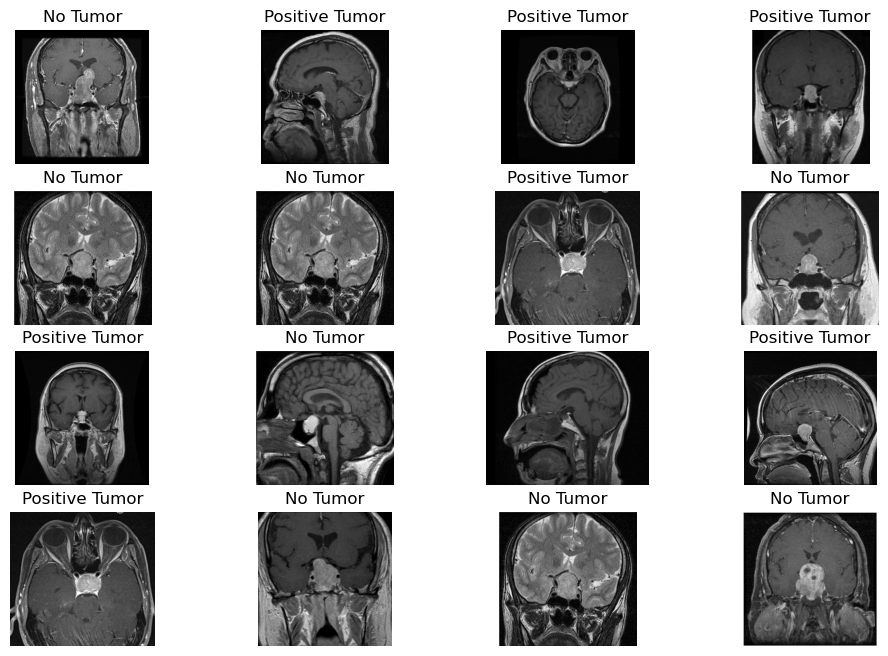

In [48]:
plt.figure(figsize=(12,8))
p = os.listdir('Brain_tumour/Training/')
c=1
for i in os.listdir('Brain_tumour/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('Brain_tumour/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1